In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Automobile_insurance_fraud.csv')
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
data.shape

(1000, 40)

In [5]:
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
data.drop('_c39',axis=1,inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [8]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64


43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64


521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: policy_number, Length: 1000, dtype: int64


01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64

In [9]:
continues=[]
for i in data.columns:
    if data[i].dtypes != 'object':
        continues.append(i)
print(continues)

['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


In [10]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [11]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=oe.fit_transform(data[i].values.reshape(-1,1))

In [12]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0


In [13]:
data.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


In [14]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

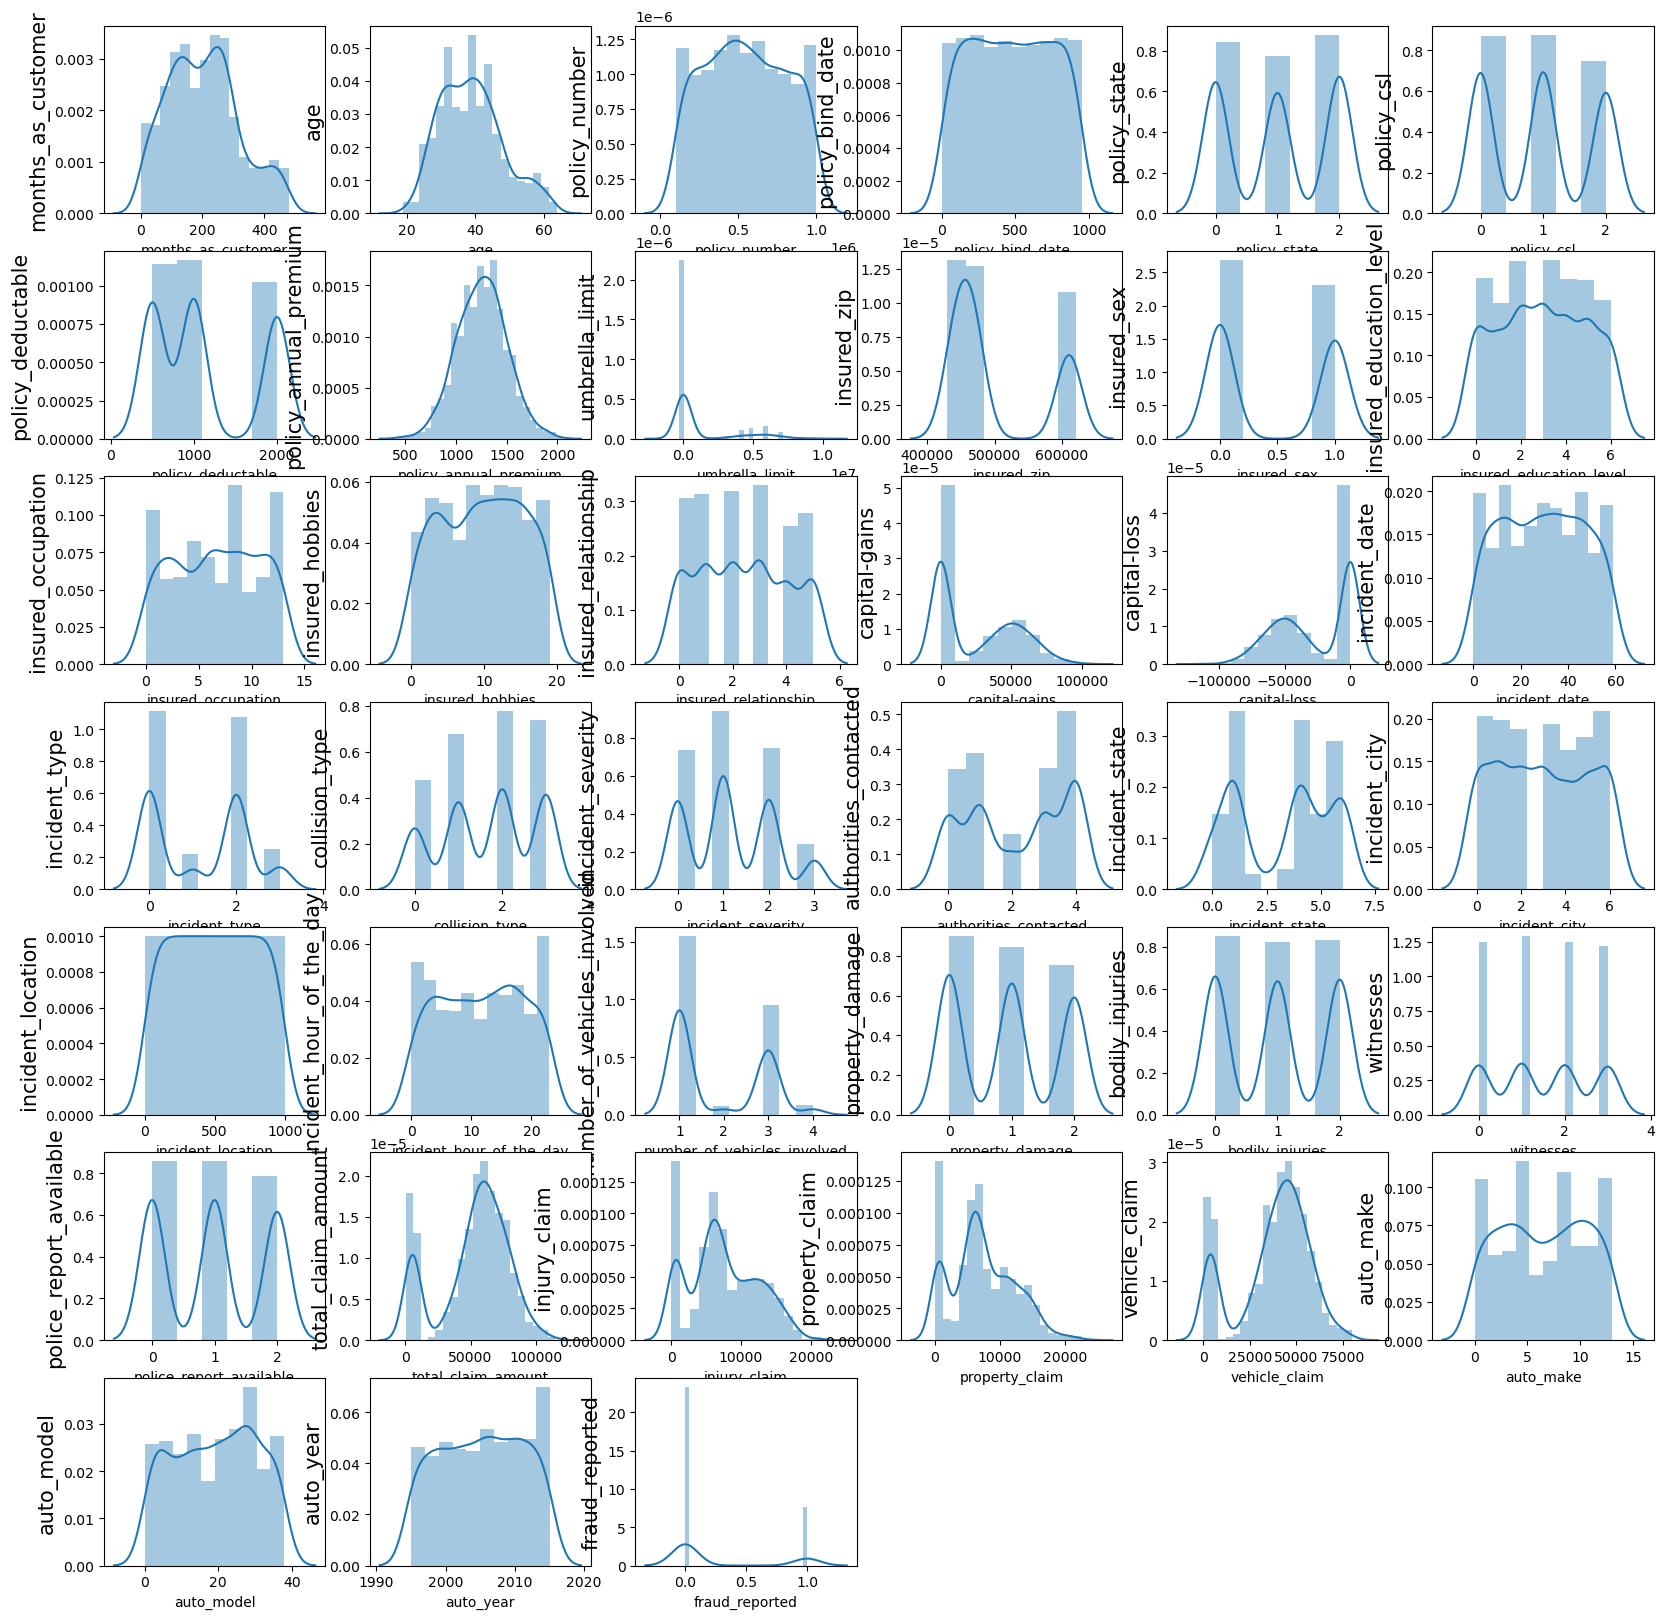

In [15]:
plt.figure(figsize=(20,20))
plot=1
for i in data.columns:
    if plot<=40:
        ax=plt.subplot(7,6,plot)
        sns.distplot(data[i])
        plt.ylabel(i,fontsize=15)
       
    plot+=1
plt.show()

In [19]:
x=data.drop('fraud_reported',axis=1)
y=data.fraud_reported

In [20]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [21]:
scaled=pd.DataFrame(ss.fit_transform(x),columns=x.columns)

In [22]:
scaled.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.078140,0.990836,-0.095953,0.209500,1.187173,0.060937,-0.222383,0.616705,-0.479476,-0.489529,...,0.009759,0.461838,1.270313,0.714257,-0.189283,1.165505,0.749653,0.856466,-1.645743,-0.183440
1,0.208995,0.334073,-0.791527,1.259397,-0.016856,0.060937,1.412784,-0.242521,1.697980,-0.461008,...,-1.210174,-1.338700,-1.198712,-1.807312,-1.363822,-1.372696,-1.823346,0.360539,-0.657470,0.315491
2,-0.608002,-1.088913,0.550566,-1.047470,1.187173,-1.182668,1.412784,0.642233,1.697980,-0.984885,...,1.229693,1.362107,0.035801,-0.686362,0.054644,-0.736072,-0.785565,-0.631315,0.959702,0.315491
3,0.452355,0.224613,-1.239334,1.059589,-1.220886,0.060937,1.412784,0.652886,2.133471,1.491682,...,0.009759,0.461838,0.035801,0.403135,-0.224130,-0.219722,0.677607,-0.879279,1.319074,1.479664
4,0.208995,0.552994,-0.695834,-1.065634,-1.220886,1.304542,-0.222383,1.341980,2.133471,1.527808,...,-1.210174,-0.438431,0.035801,-1.753121,-1.257232,-1.399654,-1.768252,-1.623169,1.049545,0.648112


In [23]:
scaled.shape

(1000, 38)

In [25]:
y.shape

(1000,)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(scaled.values,i) for i in range(len(scaled.columns))]
vif['features']=scaled.columns
vif

,values,features
0,6.838211,months_as_customer
1,6.855296,age
2,1.031858,policy_number
3,1.028526,policy_bind_date
4,1.038523,policy_state
5,1.031794,policy_csl
6,1.037514,policy_deductable
7,1.041779,policy_annual_premium
8,1.030735,umbrella_limit
9,1.034386,insured_zip


In [31]:
round(vif['values'],2)

0     6.84
1     6.86
2     1.03
3     1.03
4     1.04
5     1.03
6     1.04
7     1.04
8     1.03
9     1.03
10    1.03
11    1.04
12    1.02
13    1.05
14    1.05
15    1.04
16    1.04
17    1.03
18    5.12
19    1.72
20    1.21
21    1.08
22    1.05
23    1.03
24    1.04
25    1.11
26    5.13
27    1.04
28    1.03
29    1.04
30    1.03
31     inf
32     inf
33     inf
34     inf
35    1.07
36    1.07
37    1.04
Name: values, dtype: float64

In [33]:
scaled.drop(columns=['total_claim_amount','injury_claim','property_claim','vehicle_claim'],inplace=True)

In [34]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(scaled.values,i) for i in range(len(scaled.columns))]
vif['features']=scaled.columns
vif

,values,features
0,6.778162,months_as_customer
1,6.793231,age
2,1.031503,policy_number
3,1.028378,policy_bind_date
4,1.032941,policy_state
5,1.026191,policy_csl
6,1.027193,policy_deductable
7,1.037189,policy_annual_premium
8,1.028924,umbrella_limit
9,1.031211,insured_zip


In [36]:
scaled.drop(columns='age',inplace=True)

In [37]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(scaled.values,i) for i in range(len(scaled.columns))]
vif['features']=scaled.columns
vif

,values,features
0,1.043816,months_as_customer
1,1.031307,policy_number
2,1.028229,policy_bind_date
3,1.031843,policy_state
4,1.025790,policy_csl
5,1.027120,policy_deductable
6,1.036307,policy_annual_premium
7,1.028915,umbrella_limit
8,1.030490,insured_zip
9,1.024203,insured_sex


In [38]:
scaled.drop(columns='number_of_vehicles_involved',inplace=True)

In [39]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(scaled.values,i) for i in range(len(scaled.columns))]
vif['features']=scaled.columns
vif

,values,features
0,1.043815,months_as_customer
1,1.029791,policy_number
2,1.028165,policy_bind_date
3,1.030136,policy_state
4,1.025492,policy_csl
5,1.025181,policy_deductable
6,1.036282,policy_annual_premium
7,1.028794,umbrella_limit
8,1.028377,insured_zip
9,1.019667,insured_sex


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=.25,random_state=45)

In [42]:
from sklearn.linear_model import LogisticRegression
lor=LogisticRegression()

In [43]:
lor.fit(x_train,y_train)

LogisticRegression()

In [44]:
lor.score(x_train,y_train)

0.8106666666666666

In [45]:
lor.score(x_test,y_test)

0.764

In [46]:
y_pred=lor.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,y_pred)

0.764

In [51]:
see=pd.DataFrame({'actual':y_test,
                  'pred':y_pred})

In [52]:
see

,actual,pred
726,0.0,0.0
243,0.0,0.0
342,1.0,1.0
976,0.0,1.0
919,1.0,0.0
...,...,...
166,1.0,1.0
503,0.0,0.0
100,0.0,0.0
828,0.0,0.0
